In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from numpy import loadtxt
from functools import reduce
import time
from scipy.signal import argrelextrema
from ipywidgets import *
#from Harmonic_functions import *
%matplotlib inline

In [2]:
path_abs='/Users/YTsBaCh/Documents/DATA SCIENCES/20190412 HARMONIC SCANNER/'
data = pd.read_csv(path_abs+'EURUSD_1mn.csv')
data.columns = [['Date','Open','High','Low','Close','Vol']]
data.drop_duplicates(keep=False)

,Date,Open,High,Low,Close,Vol
0,11.04.2016 00:00:00.000 GMT+0200,1.14056,1.14064,1.14022,1.14047,123.58
1,11.04.2016 00:01:00.000 GMT+0200,1.14048,1.14053,1.14034,1.14038,79.09
2,11.04.2016 00:02:00.000 GMT+0200,1.14048,1.14053,1.14030,1.14048,203.30
3,11.04.2016 00:03:00.000 GMT+0200,1.14048,1.14058,1.14040,1.14041,350.61
4,11.04.2016 00:04:00.000 GMT+0200,1.14043,1.14056,1.14043,1.14056,91.51
5,11.04.2016 00:05:00.000 GMT+0200,1.14056,1.14066,1.14051,1.14063,369.74
6,11.04.2016 00:06:00.000 GMT+0200,1.14065,1.14082,1.14052,1.14057,79.19
7,11.04.2016 00:07:00.000 GMT+0200,1.14056,1.14061,1.14055,1.14060,21.67
8,11.04.2016 00:08:00.000 GMT+0200,1.14062,1.14079,1.14056,1.14076,285.84
9,11.04.2016 00:09:00.000 GMT+0200,1.14078,1.14081,1.14074,1.14076,487.58


In [3]:
#data.Date = pd.to_datetime(data.Date,format='%d%b%Y:%H:%M:%S.%f')

In [4]:
price = data.Close.copy()


In [18]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
def peak_detect(price,order=10):
    max_idx = list(argrelextrema(price,np.greater,order=order)[0])
    min_idx = list(argrelextrema(price,np.less,order=order)[0])
    idx = max_idx + min_idx + [len(price)-1]
    idx.sort()
    current_idx = idx[-5:]
    
    start = min(current_idx)
    end = max(current_idx)
    current_pat = price[current_idx]
    return current_idx,current_pat,start,end  
  
def is_gartley(moves,err_allowed):  
    
    XA=moves[0]
    AB=moves[1]
    BC=moves[2]
    CD=moves[3]
    
    AB_range = np.array([0.618 - err_allowed,0.618 + err_allowed])*abs(XA)
    BC_range = np.array([0.382 - err_allowed,0.886 + err_allowed])*abs(AB)
    CD_range = np.array([1.27 - err_allowed,1.618 + err_allowed])*abs(BC)
        
    
    if XA>0 and AB<0 and BC>0 and CD<0:
        
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
            return 1
        else:
            return np.isnan
        
    elif XA<0 and AB>0 and BC<0 and CD>0:
        
               
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
        
            return -1
        else:
            return np.isnan
    else:
        return np.isnan

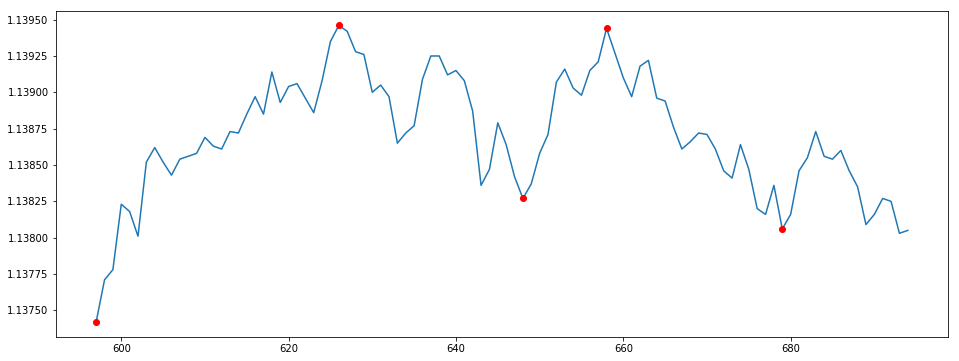

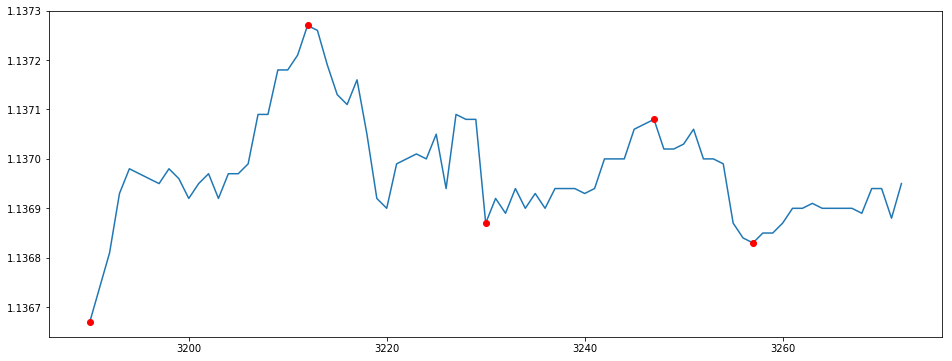

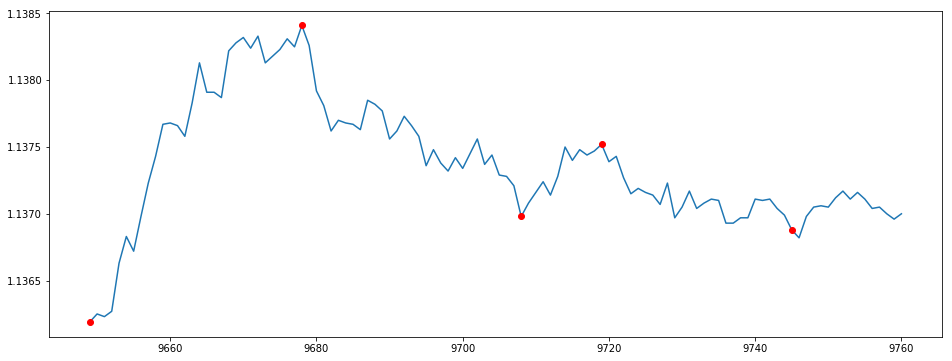

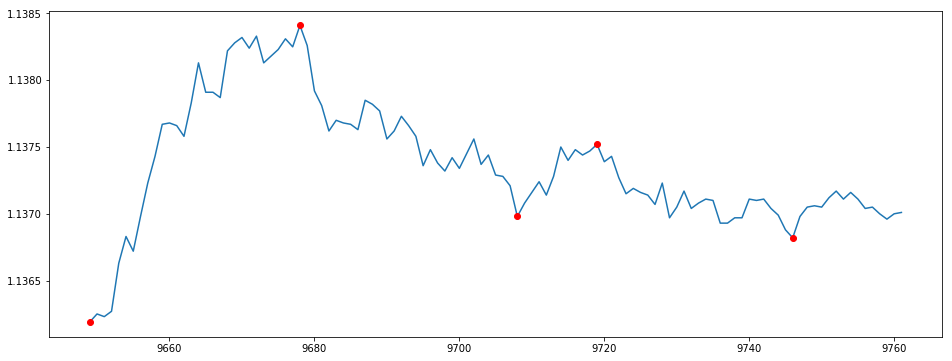

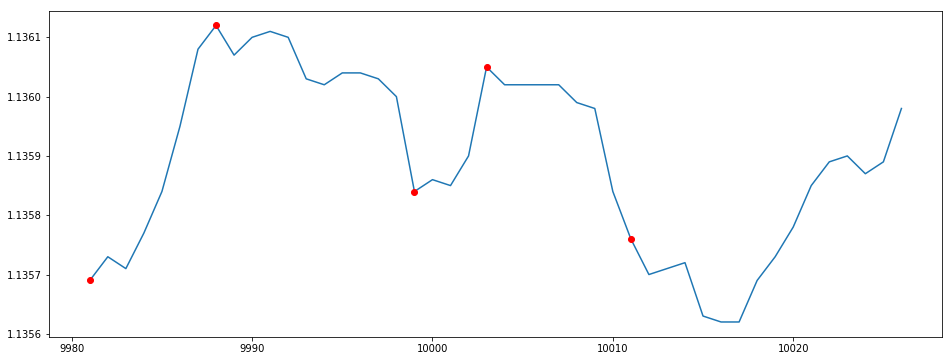

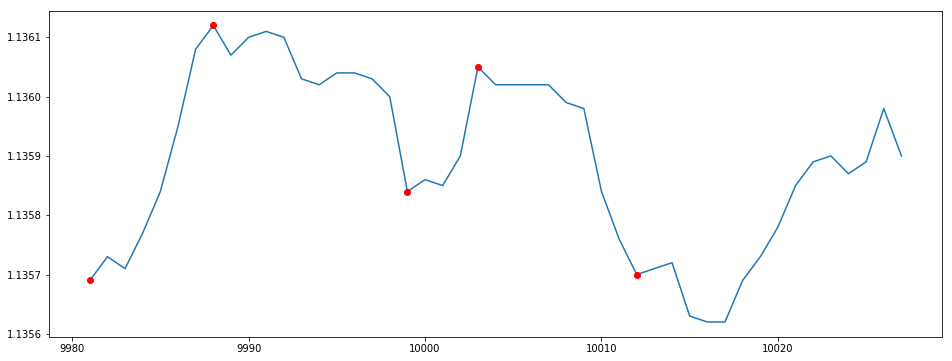

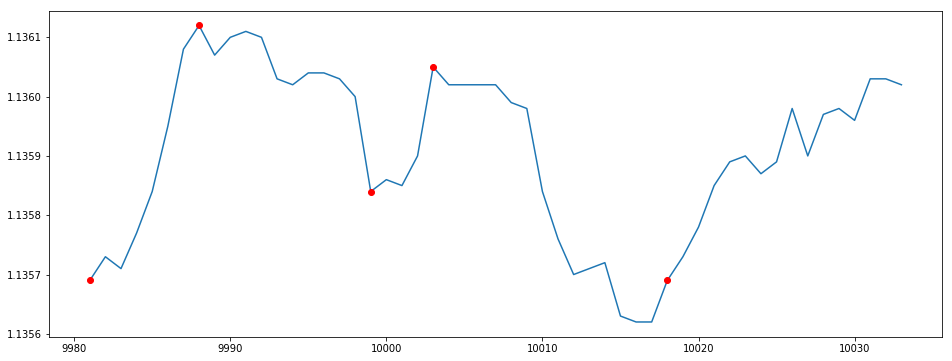

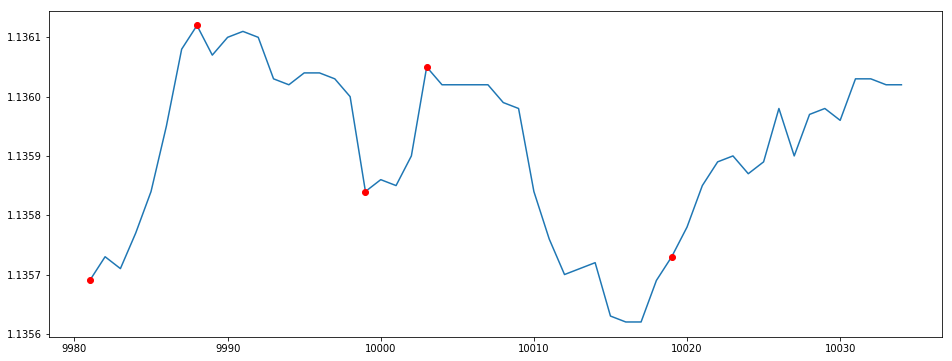

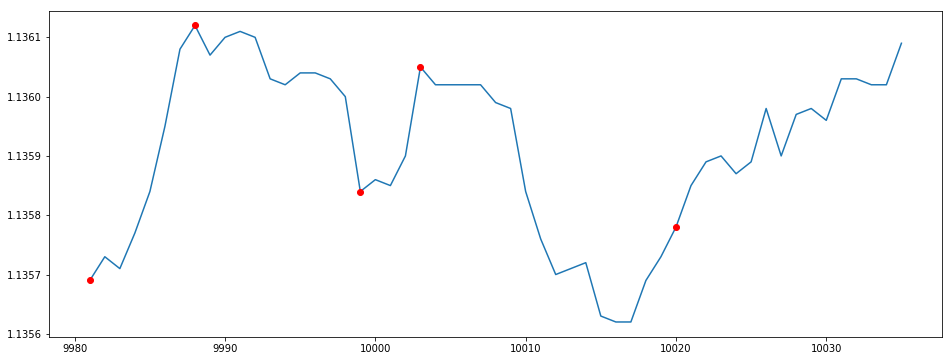

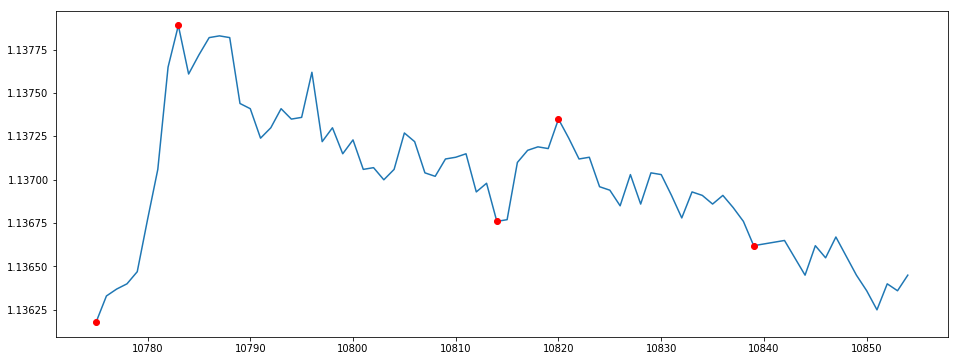

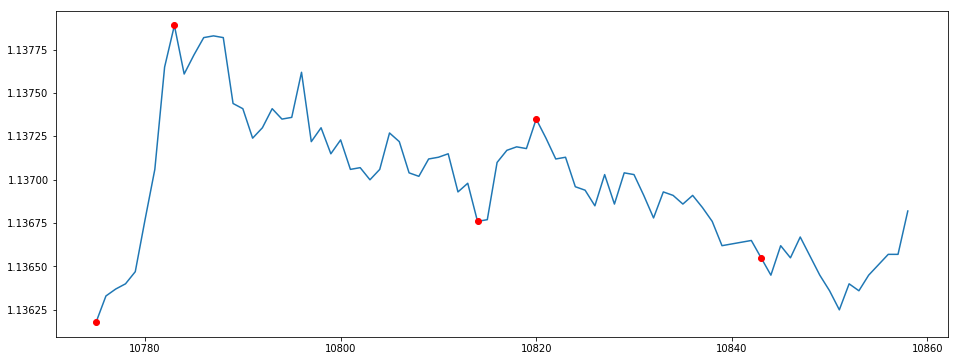

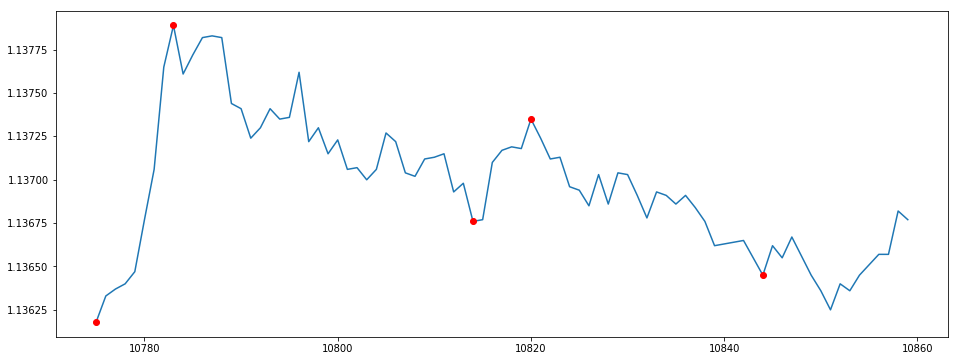

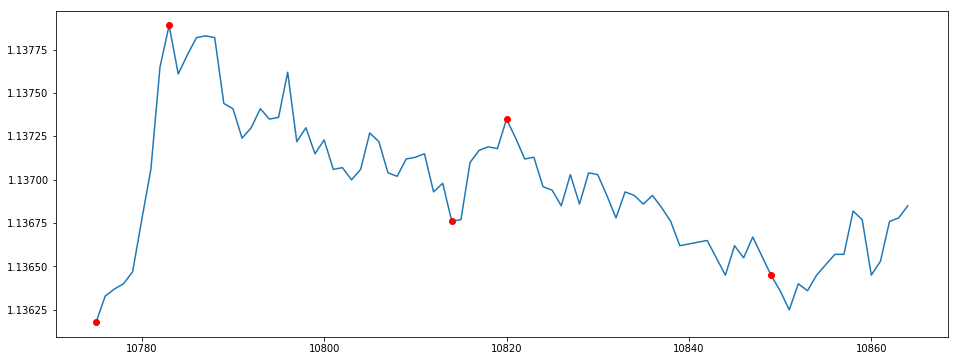

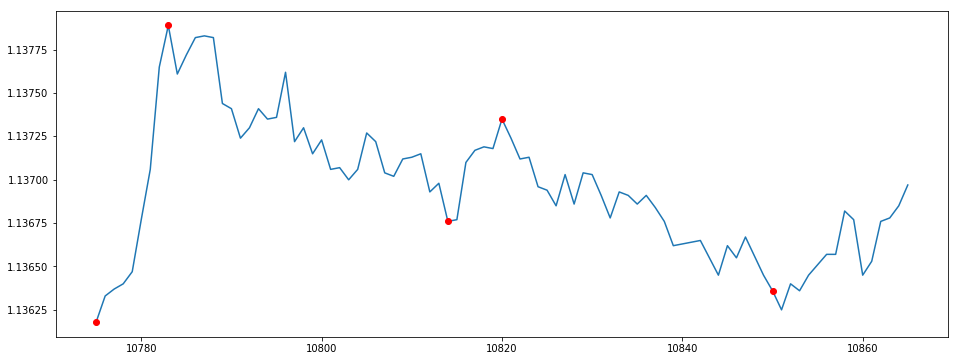

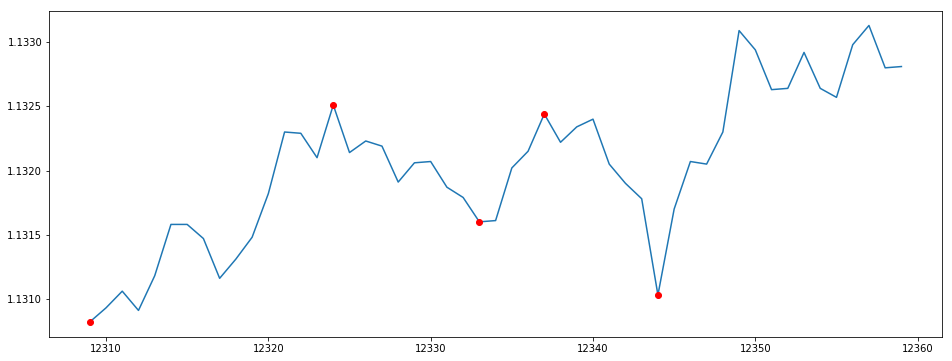

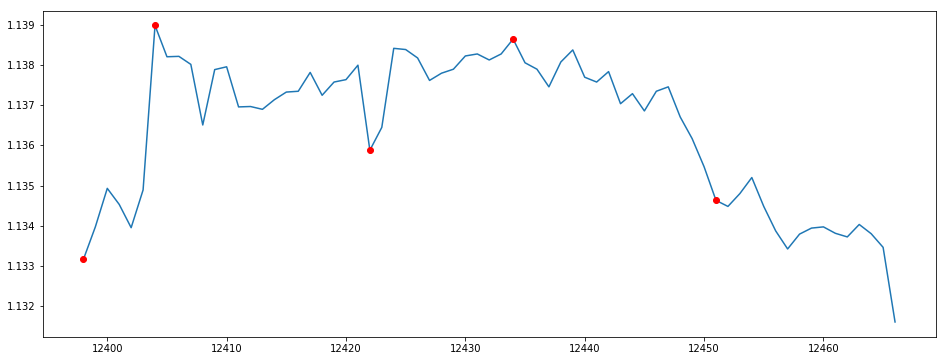

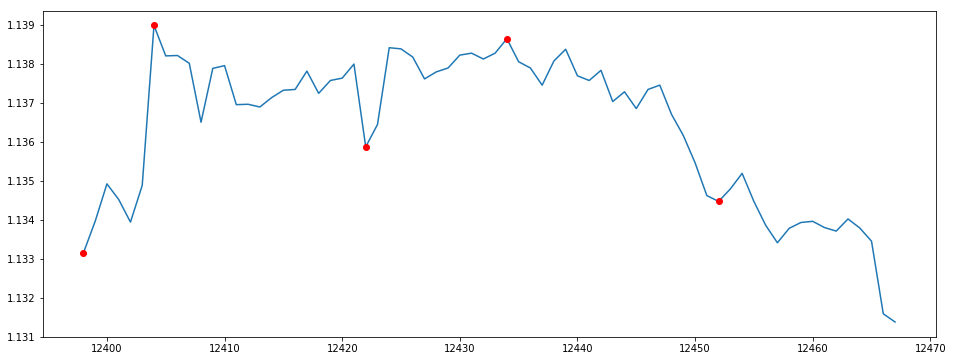

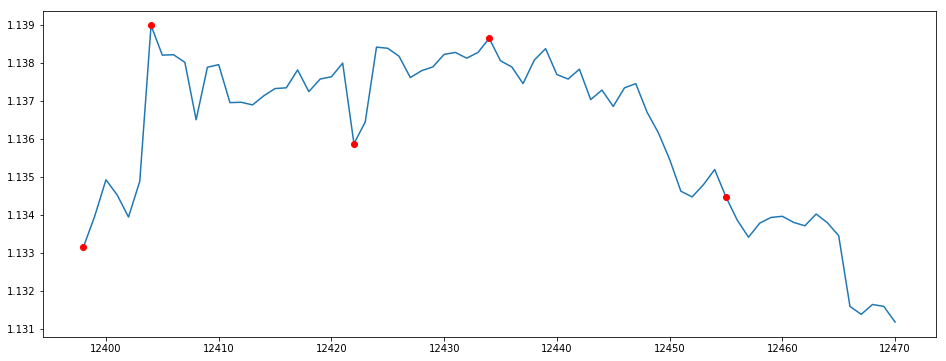

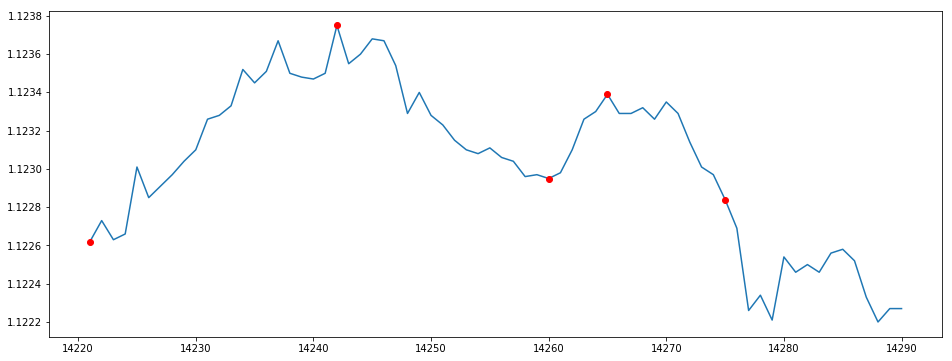

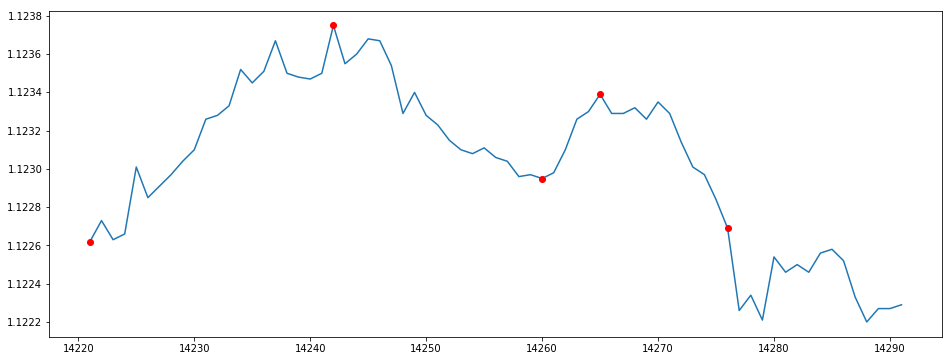

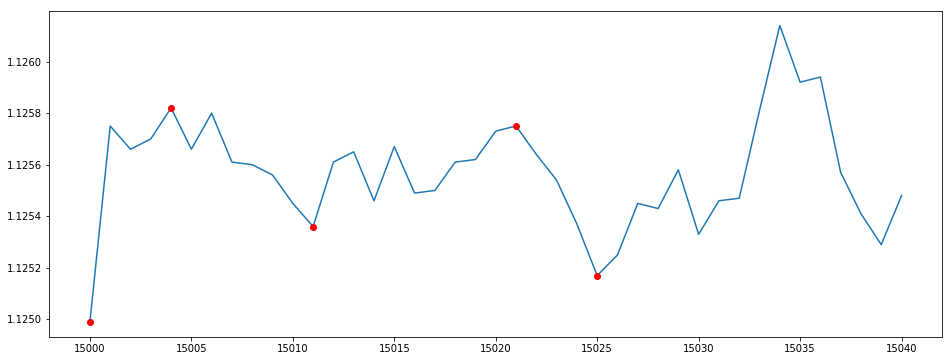

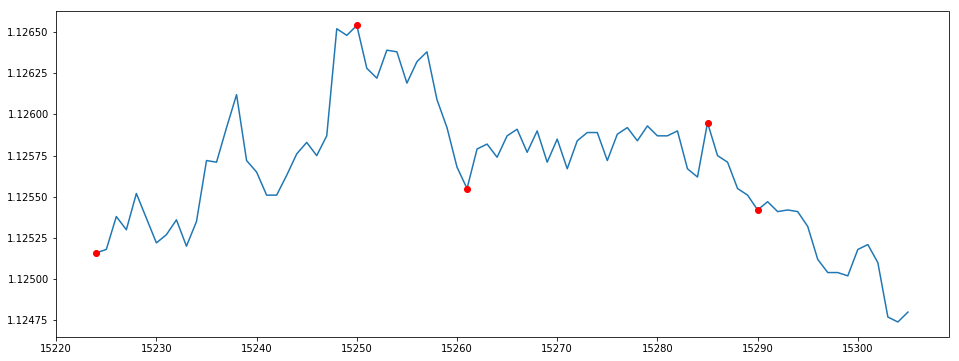

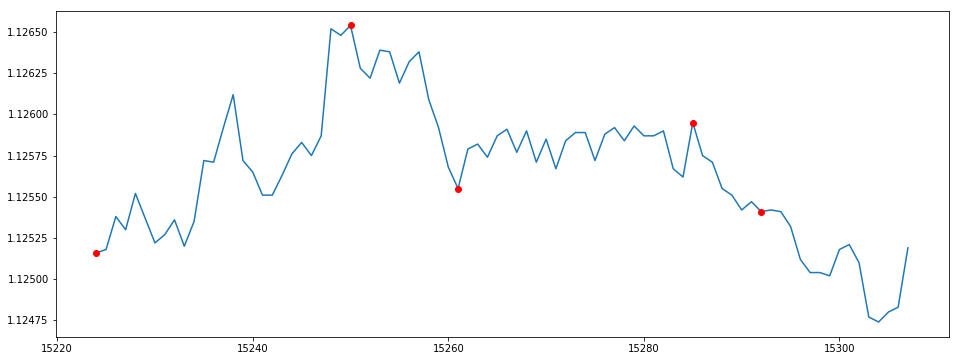

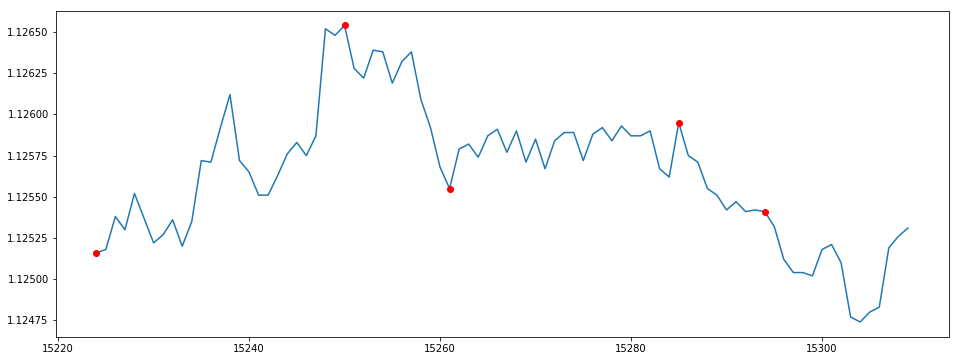

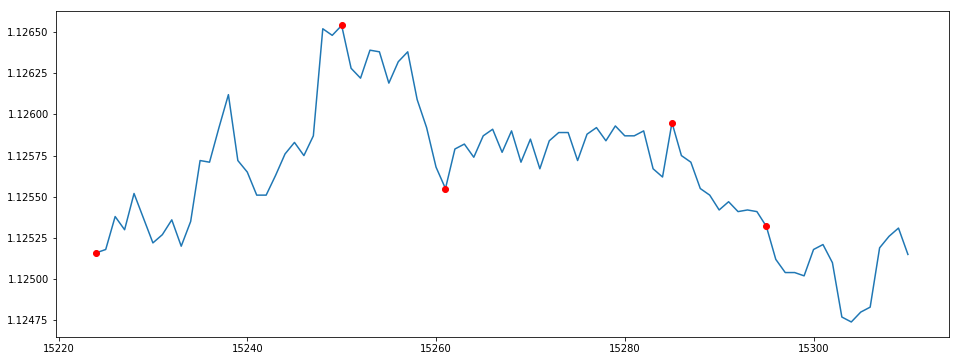

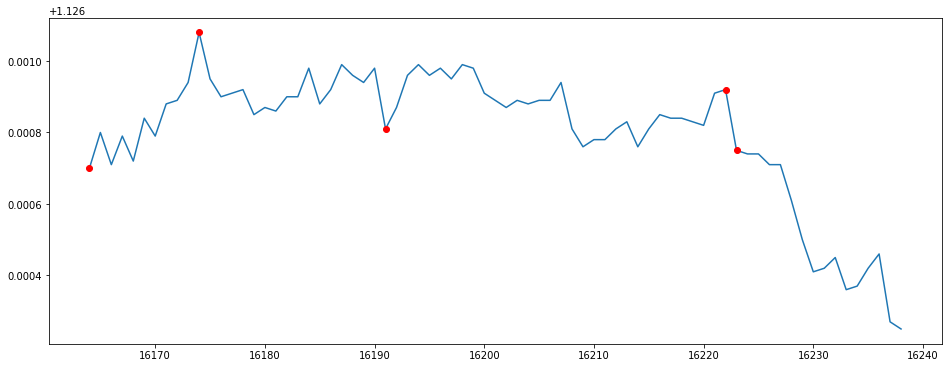

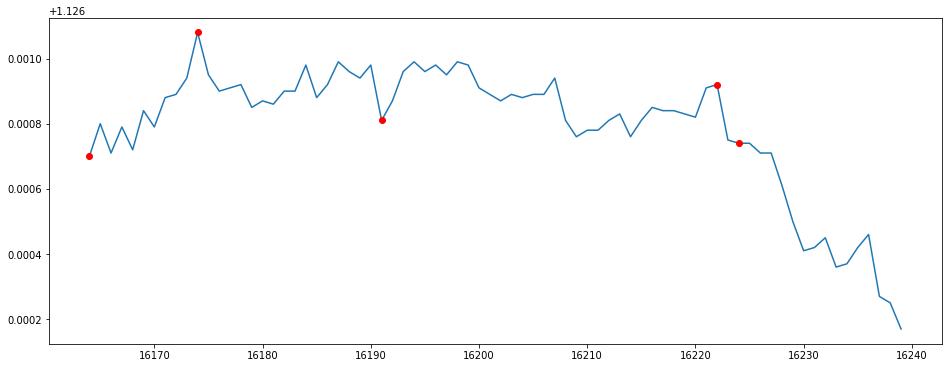

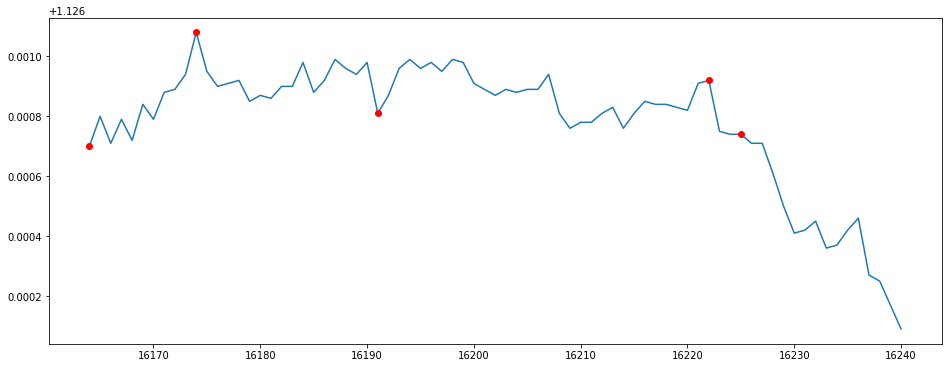

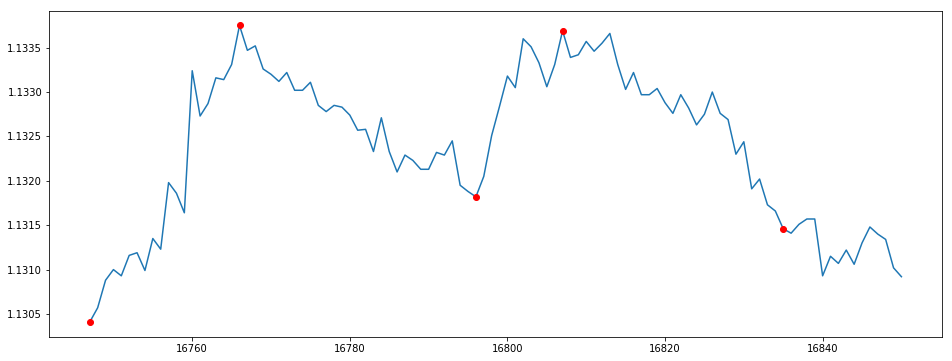

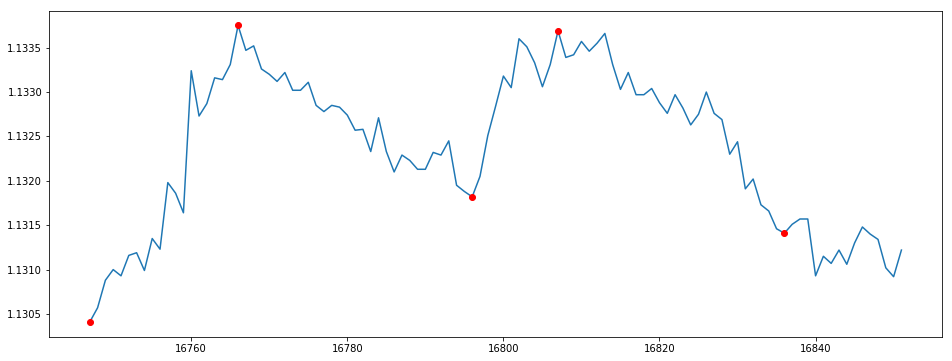

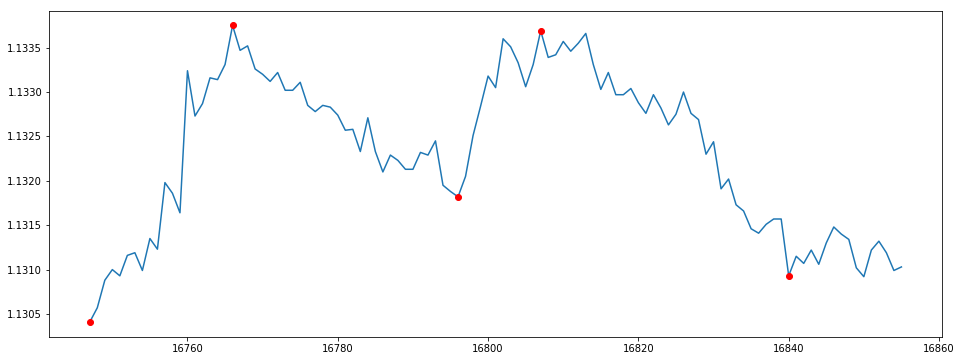

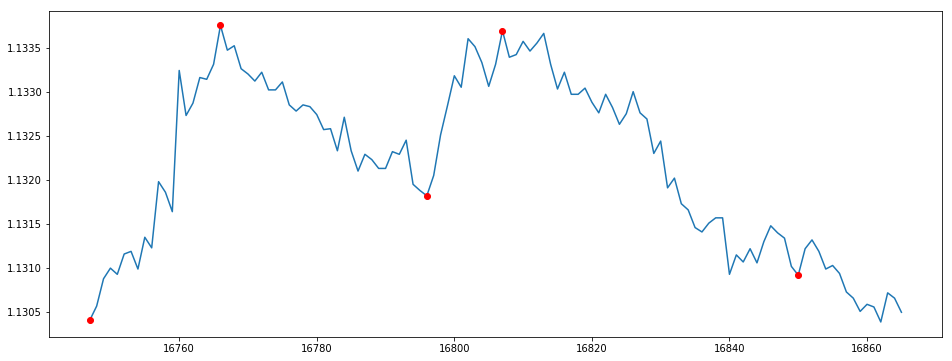

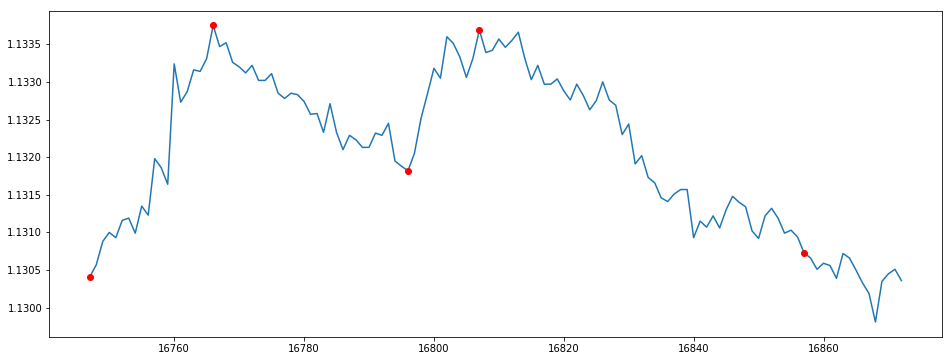

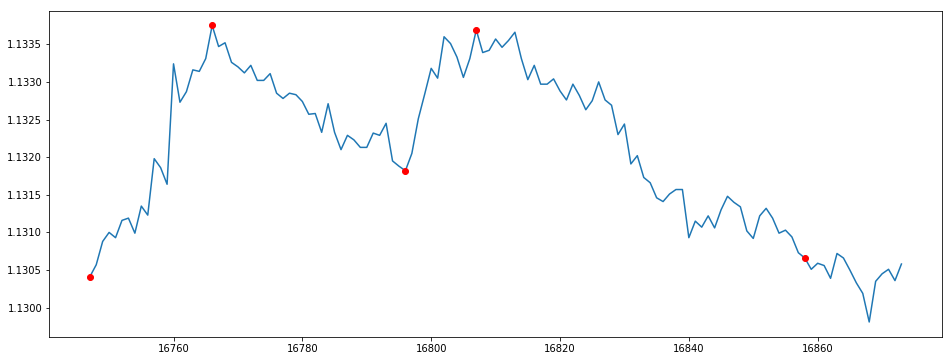

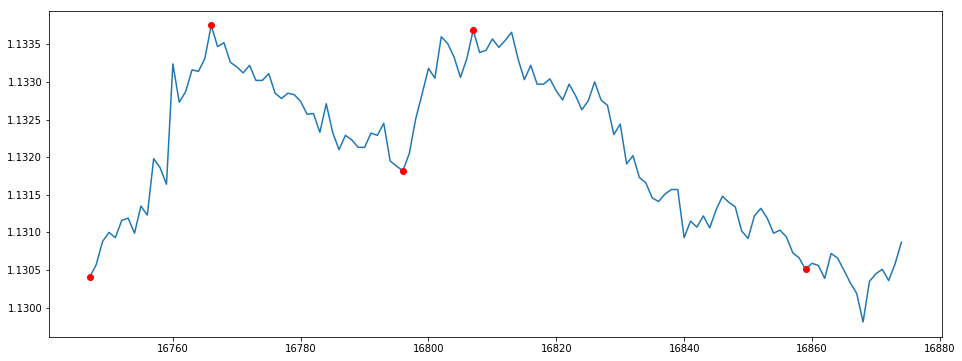

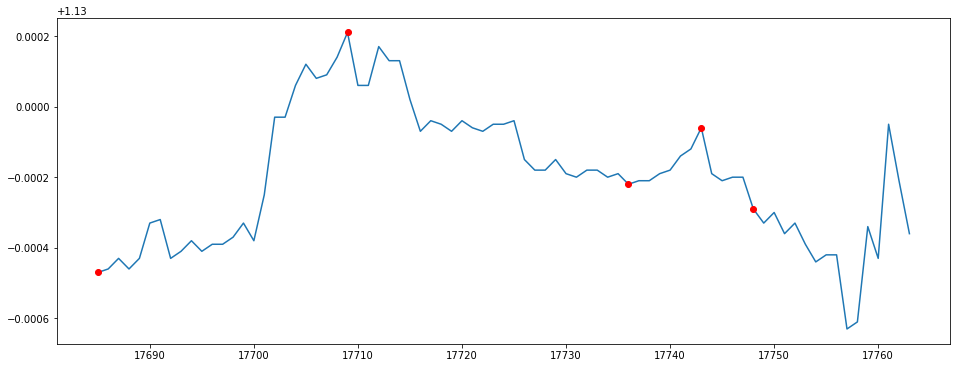

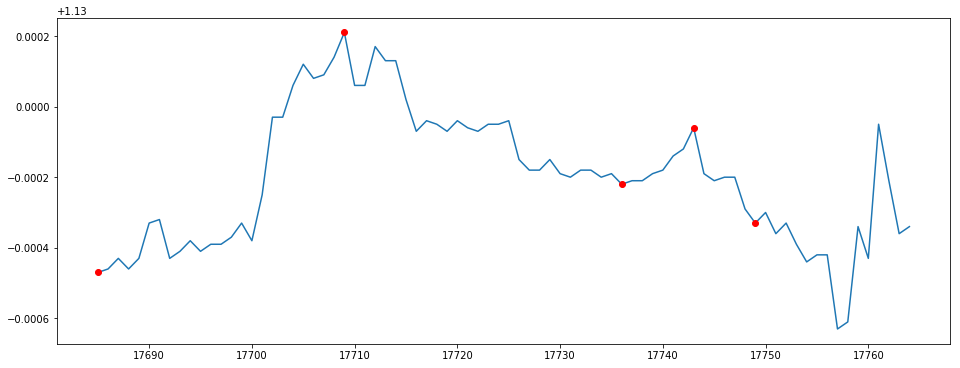

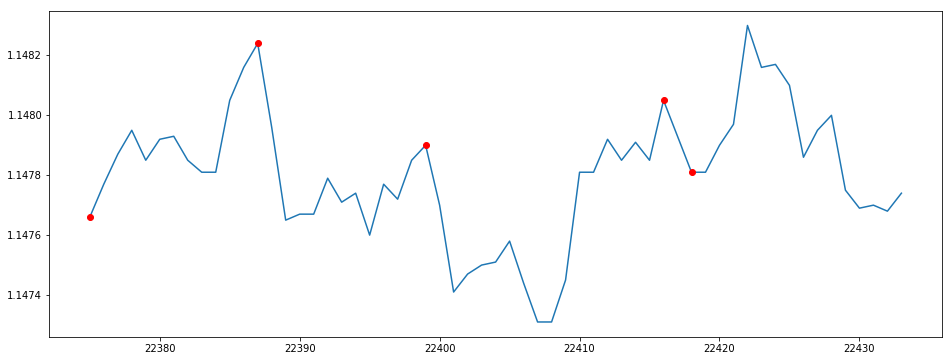

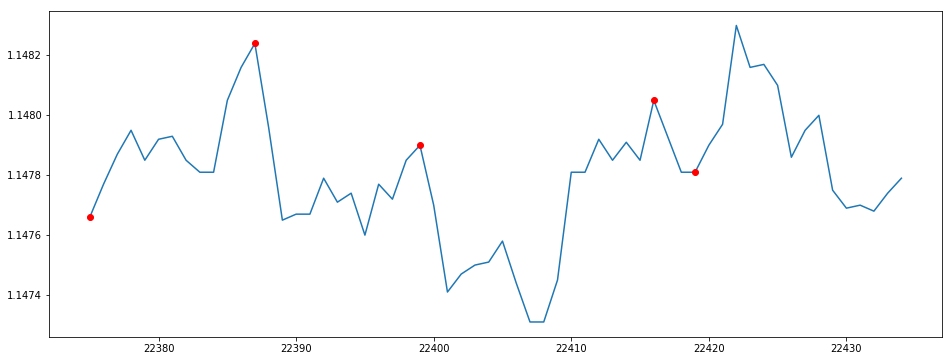

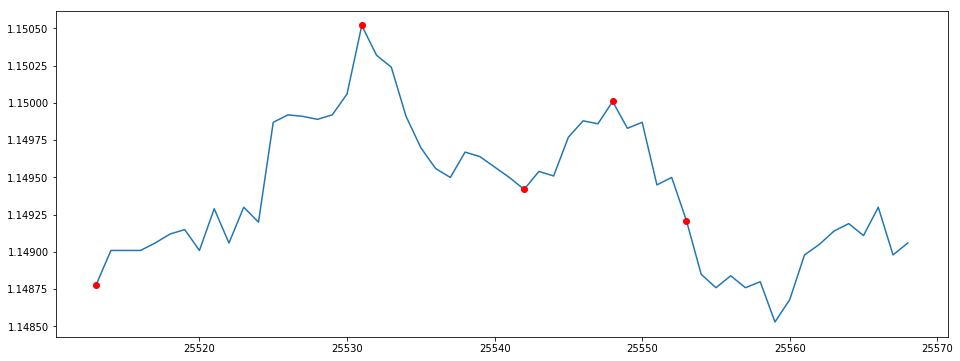

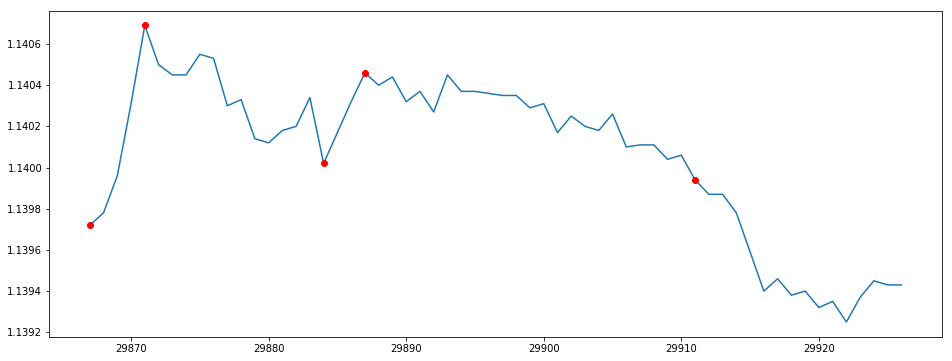

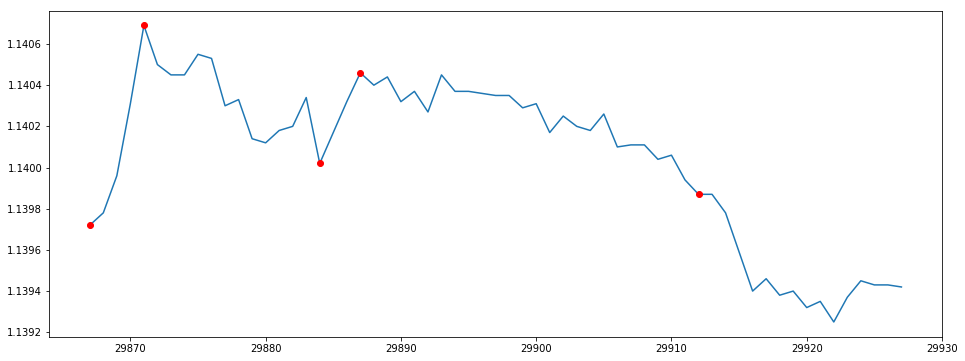

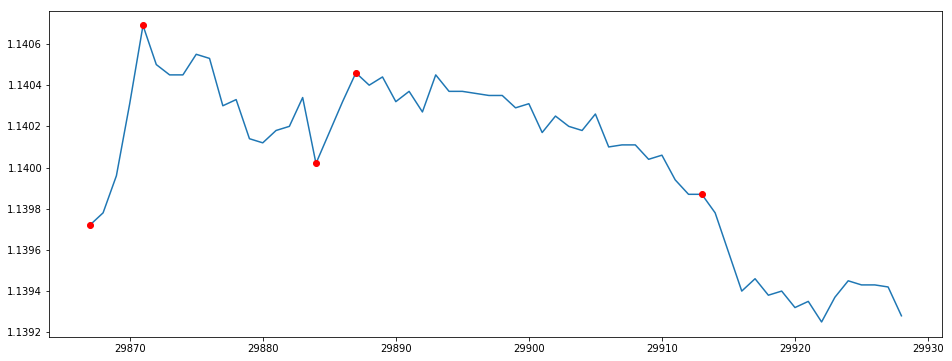

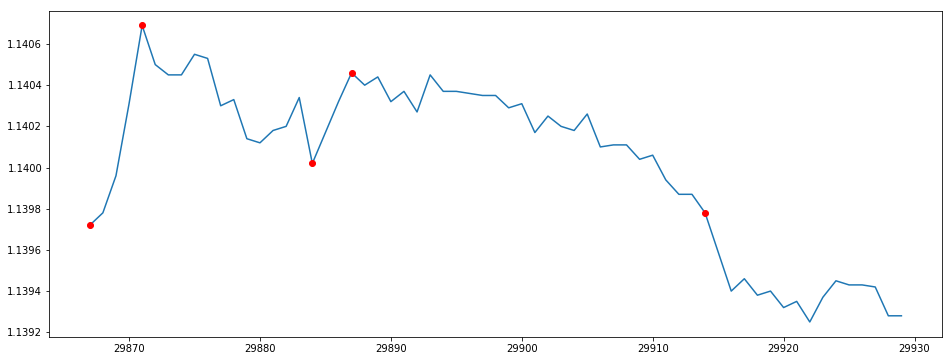

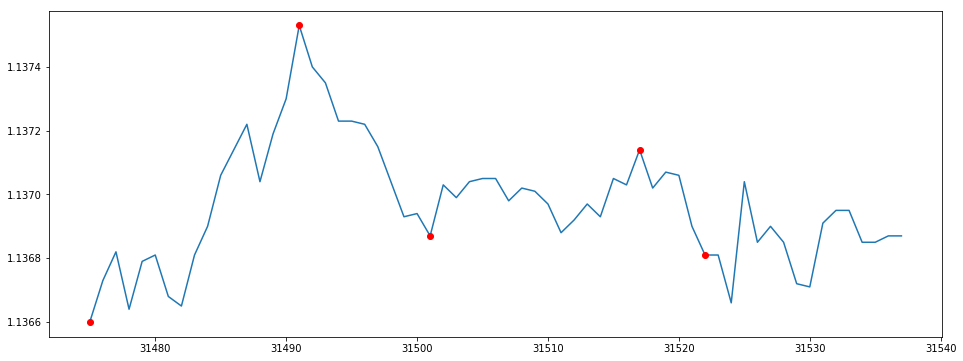

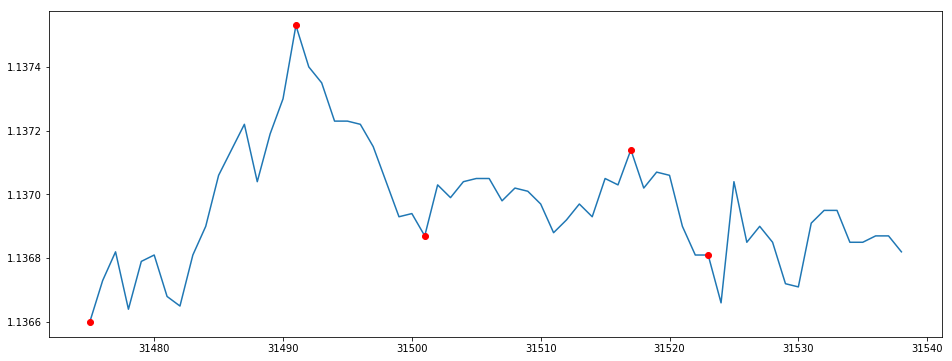

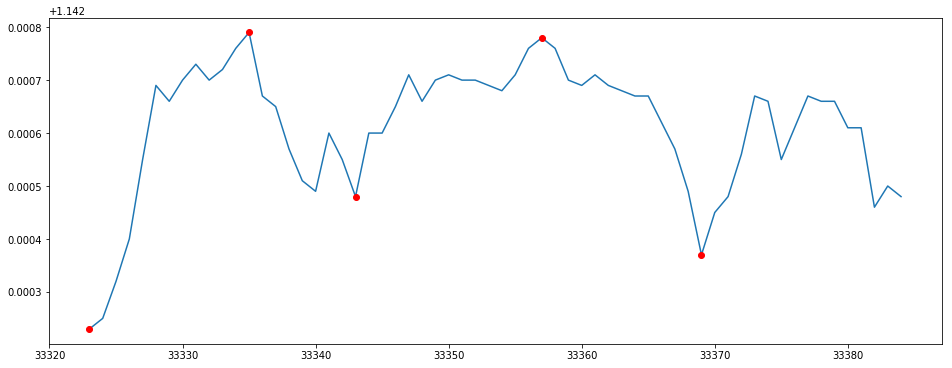

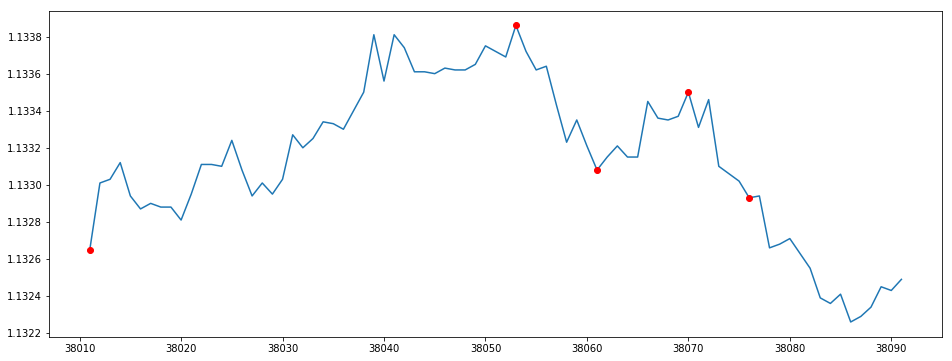

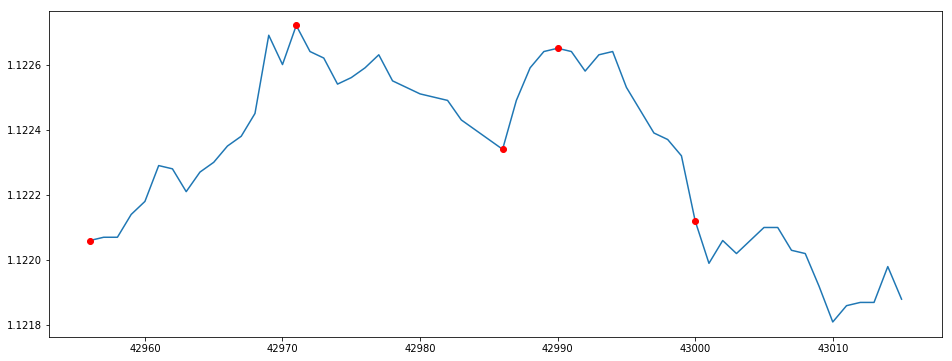

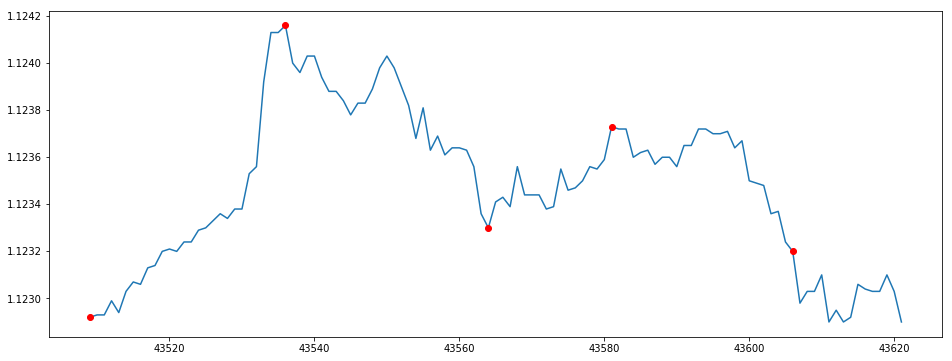

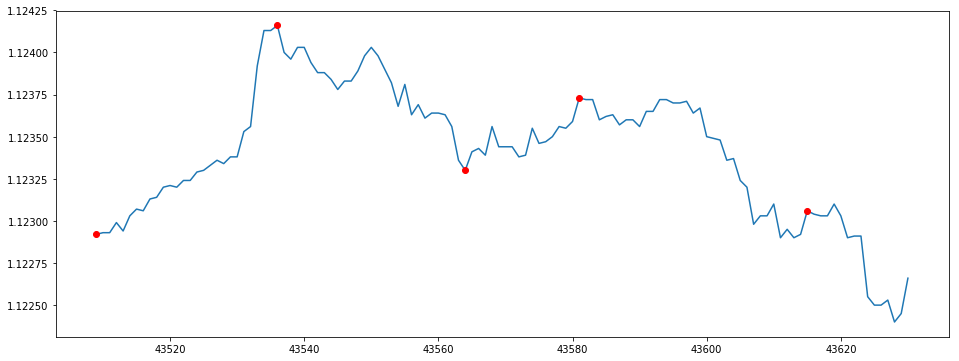

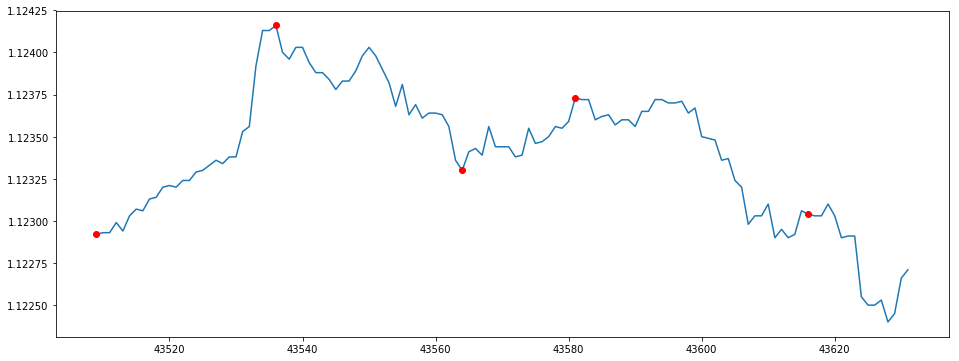

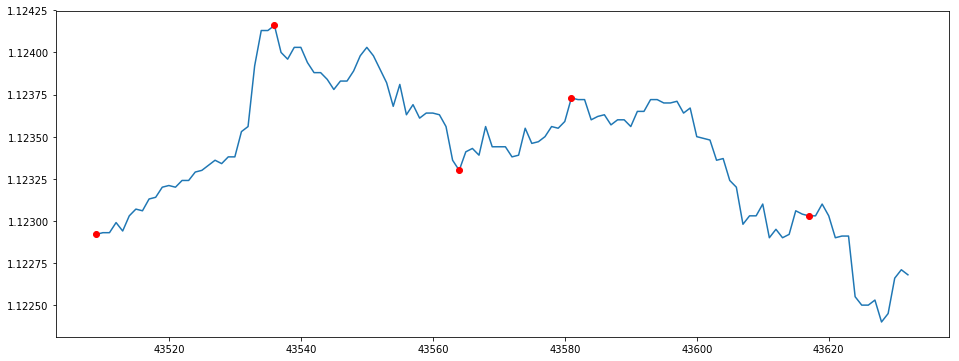

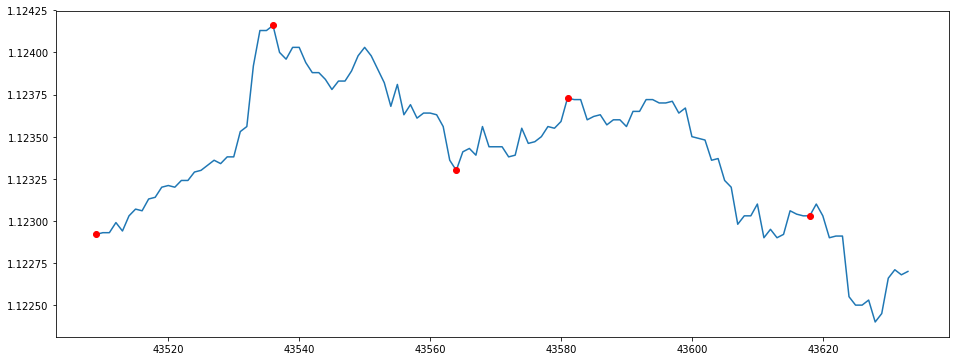

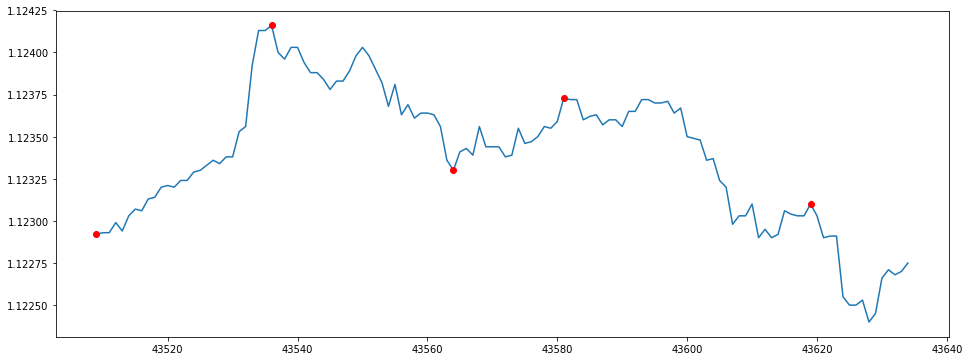

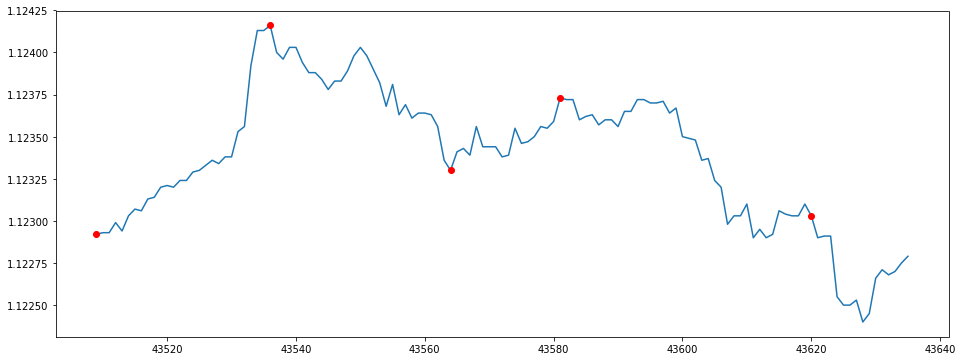

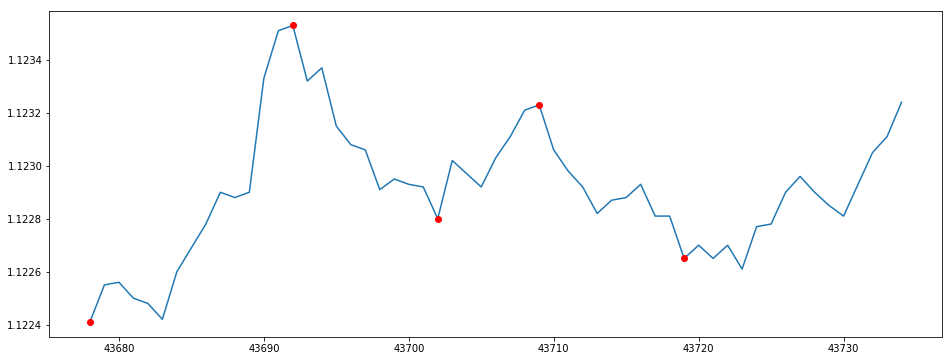

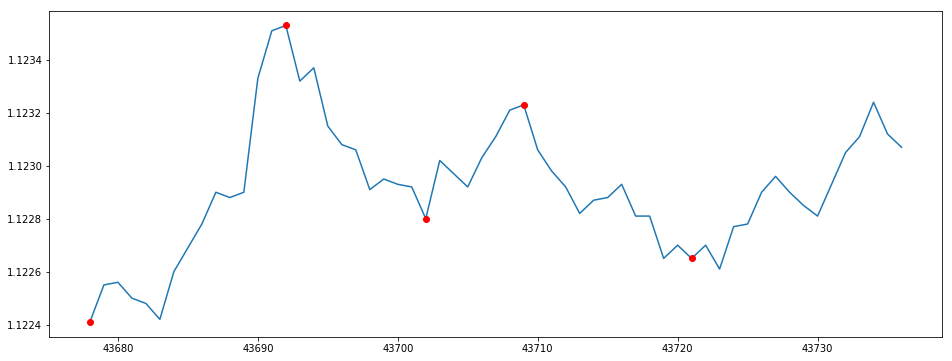

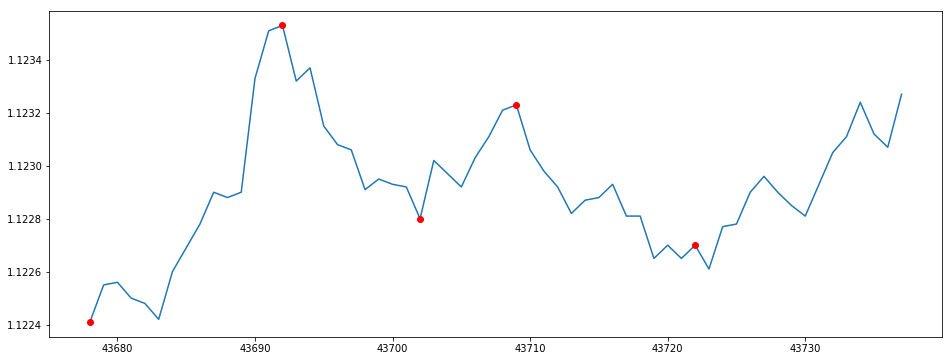

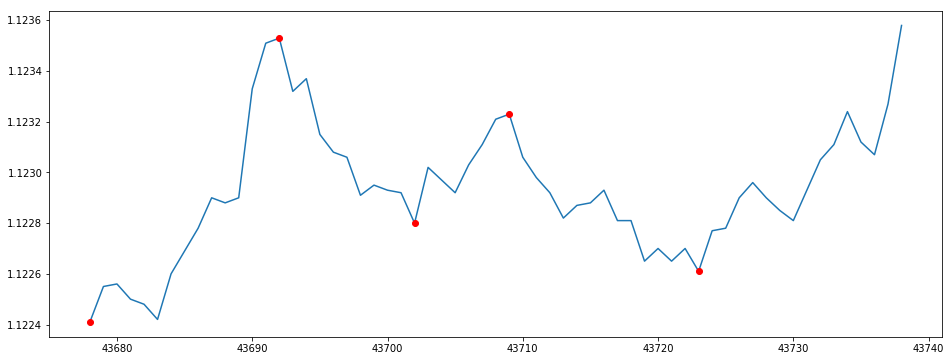

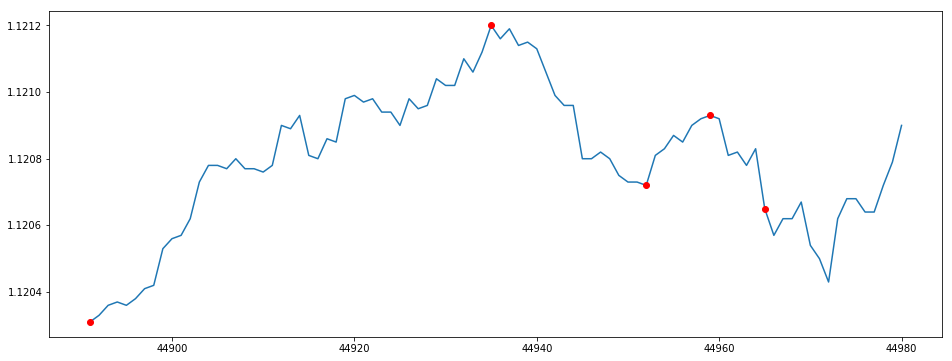

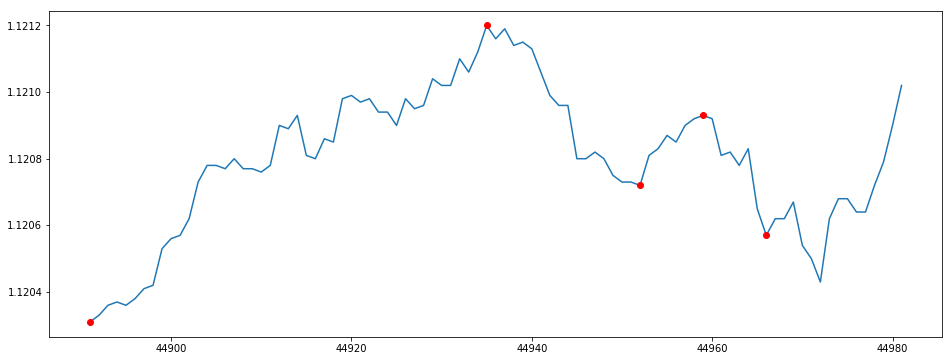

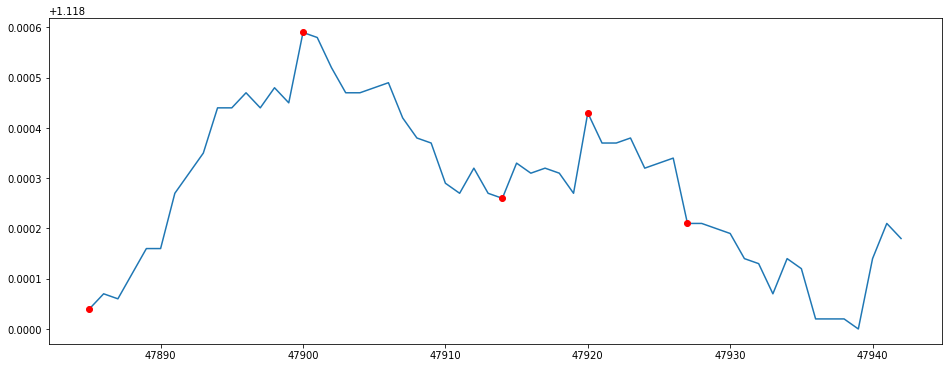

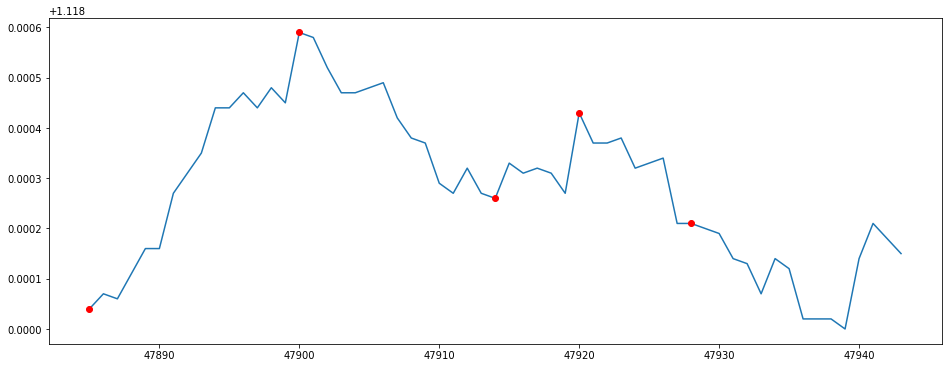

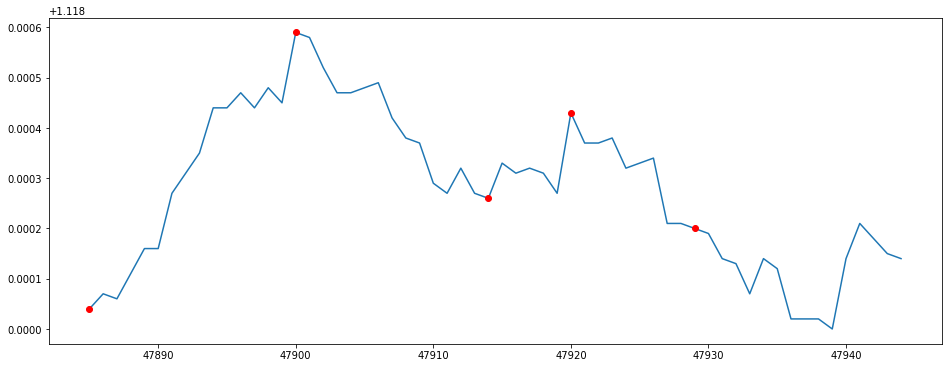

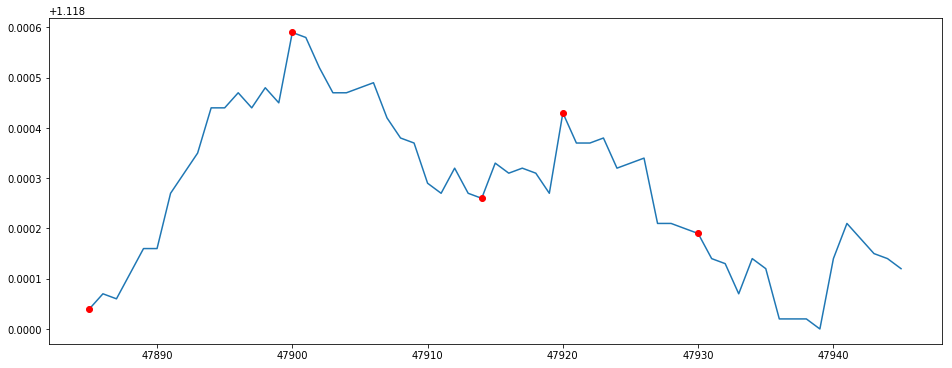

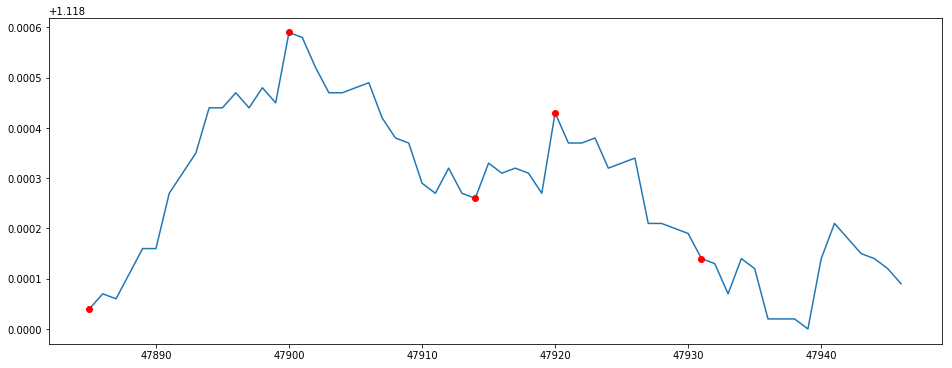

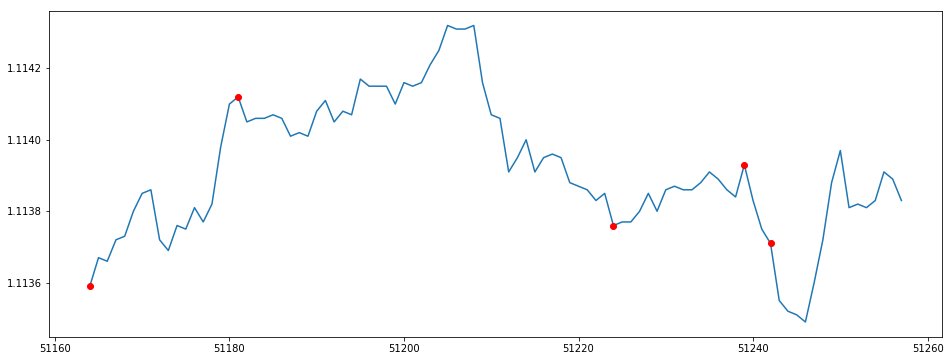

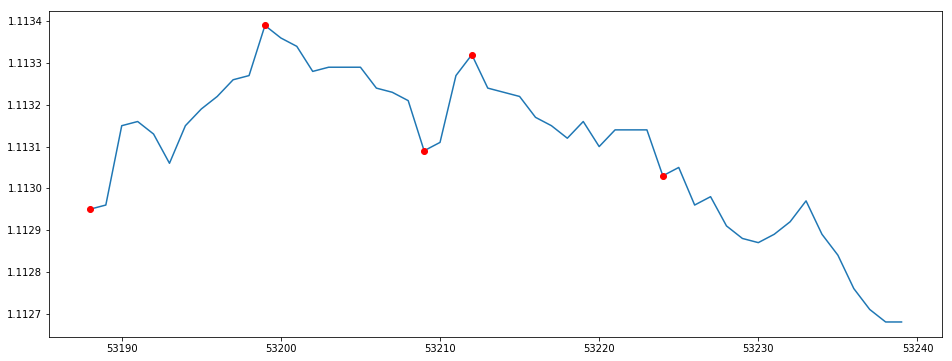

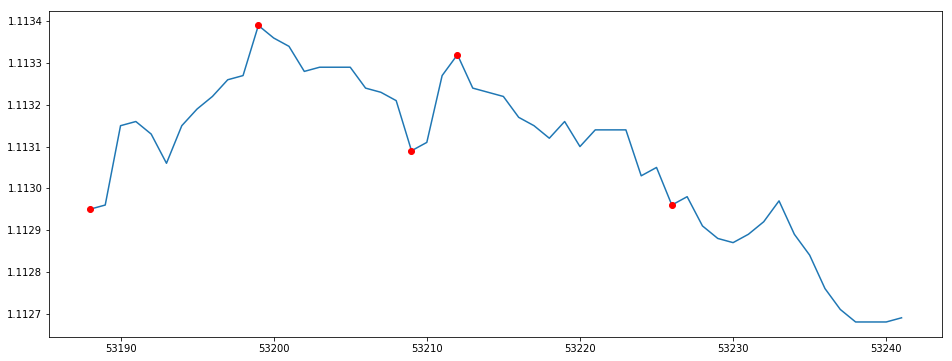

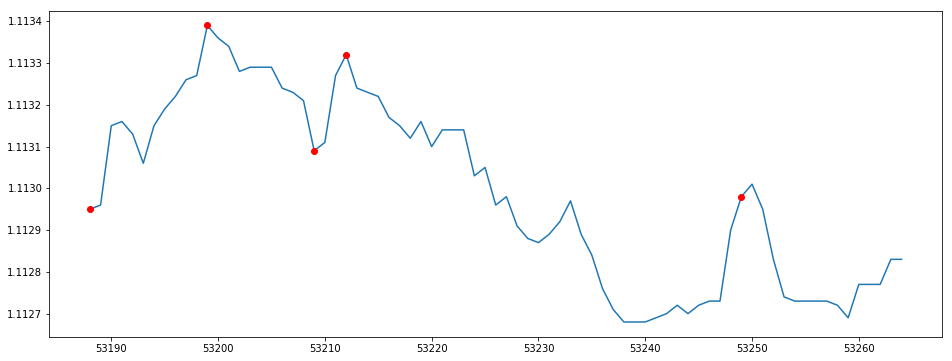

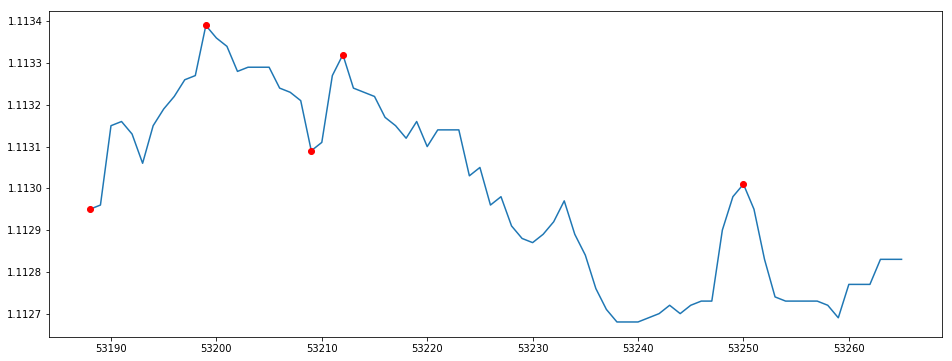

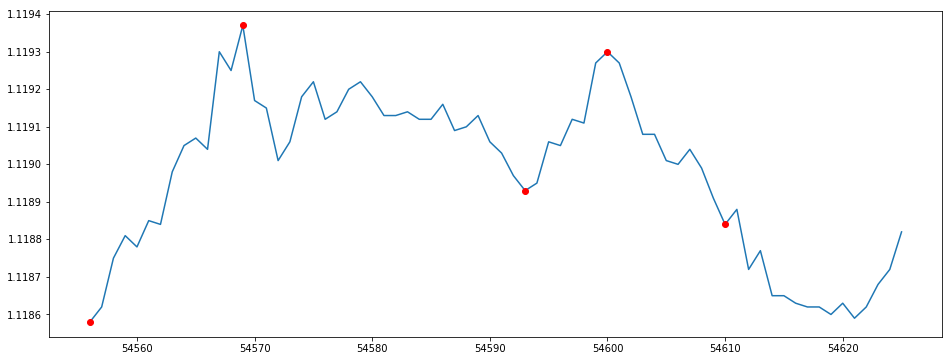

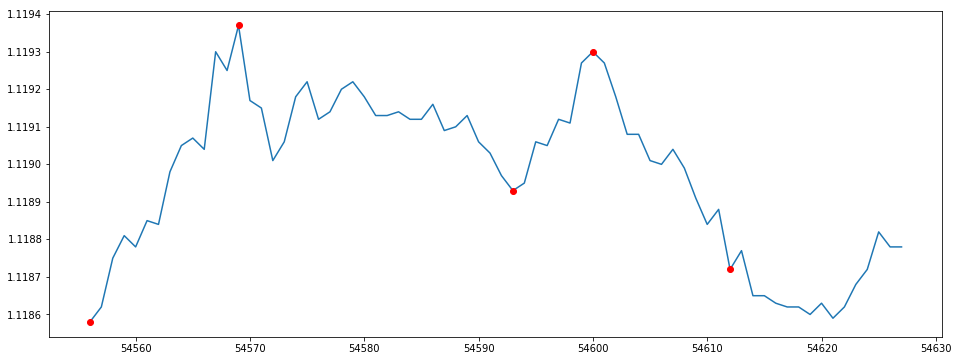

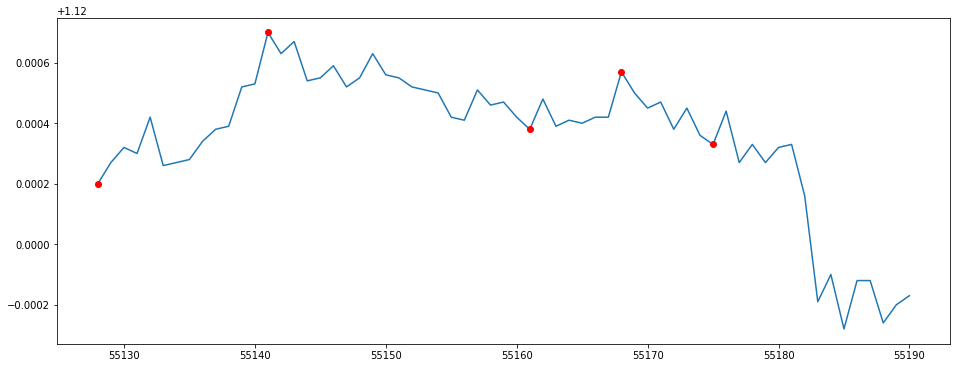

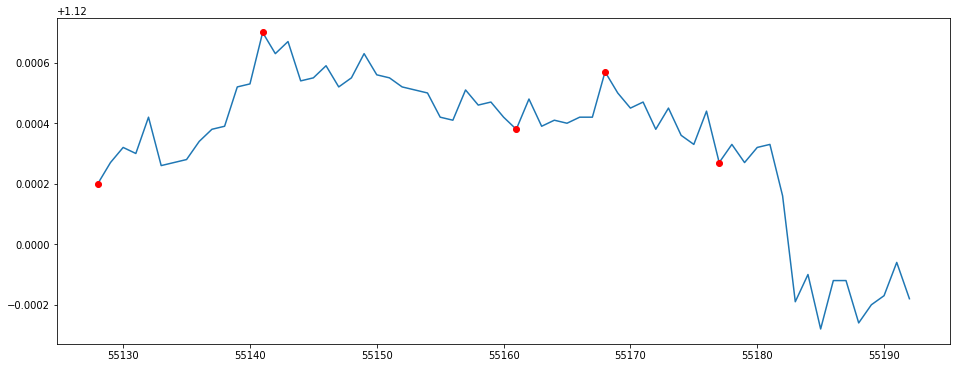

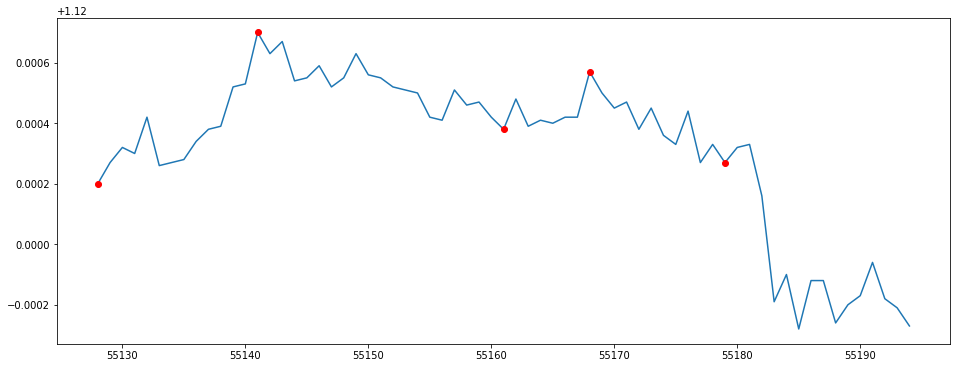

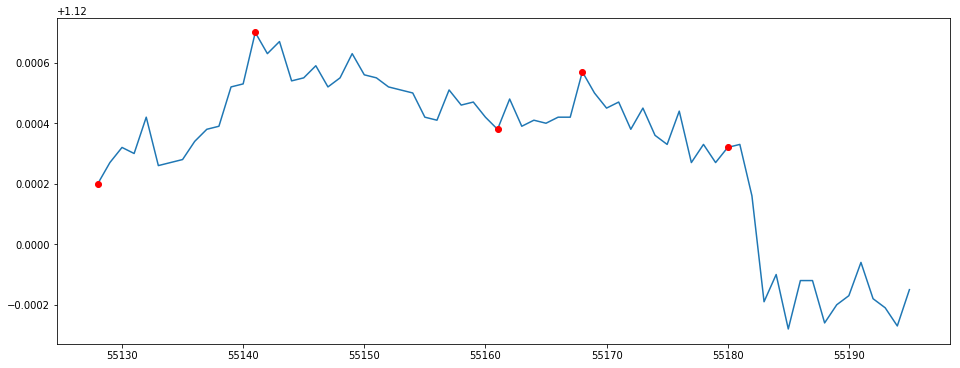

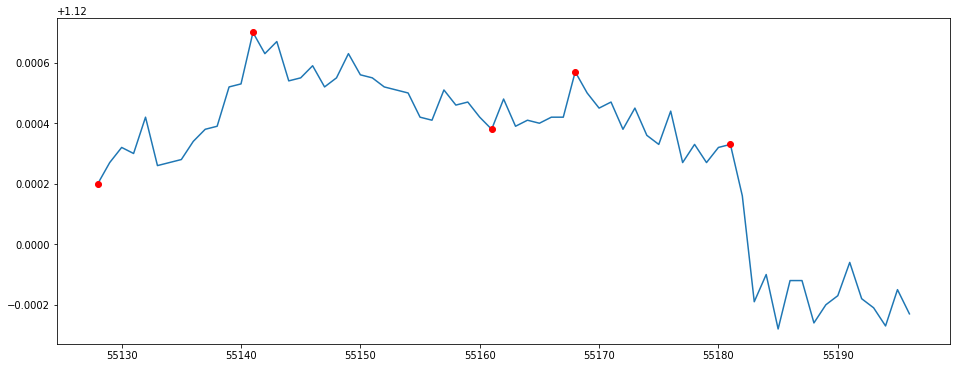

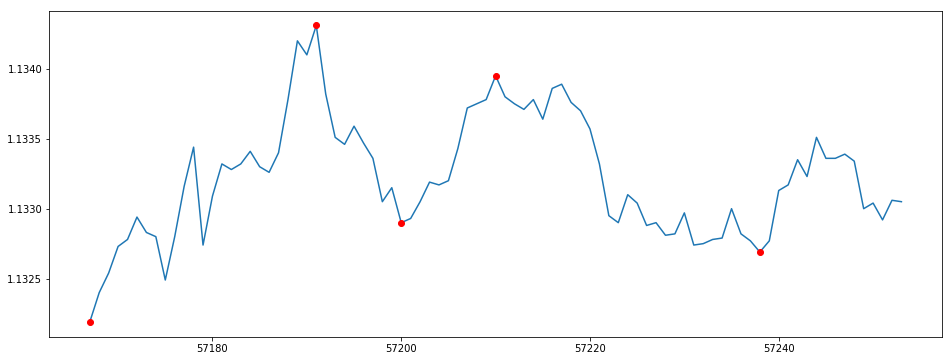

KeyboardInterrupt: 

In [21]:
#find extrema

err_allowed = 10.0/100
for i in range(100,len(price)):
    
    current_idx,current_pat,start,end = peak_detect(price.values[:i])
  
  
    
    XA = current_pat[1] - current_pat[0]
    AB = current_pat[2] - current_pat[1]
    BC = current_pat[3] - current_pat[2]
    CD = current_pat[4] - current_pat[3]

    moves=[XA,AB,BC,CD]

    res = is_gartley(moves,err_allowed)
    if res ==1:
        plt.figure(figsize=(16,6))
        plt.plot(np.arange(start,i+15),price.values[start:i+15])
        plt.plot(current_idx,current_pat,"ro")
        plt.show()
    
    
    

In [17]:
current_pat

array([[ 1.14038],
       [ 1.14078],
       [ 1.14048],
       [ 1.14031],
       [ 1.14055]])